<a href="https://colab.research.google.com/github/kevjavort11/DS_PrimeraEntrega/blob/main/ProyectoDS_ParteI_Ortega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science I : Fundamentos para la Ciencia de Datos**

**1RA PRE ENTREGA**

**Fecha: 25/06/2024**

**Estudiante : Ortega Hernandez Kevin Javier**

**Objetivos**


1. *Preparación de hipótesis*
2. *Visualizaciones multivariables*
3. *Relación de gráficos - hipotesis*
4. *Identificación de datos nulos*
5. *Hallazgos de las variables relevantes*


# **Dataset:**

[CTU-IoT-Malware-Capture-48-1](https://docs.google.com/spreadsheets/d/16rvHjh1RfR3YSPoao5vYDXLG3CG1SZYcNRssSlaEe3U)

# **Abstract:**

El dataset *CTU-IoT-Malware-Capture-48-1* consta de veintitrés capturas de diferentes tráficos de red IoT. Estos escenarios se dividen en veinte capturas de red de dispositivos IoT infectados (que tendrán el nombre de la muestra de malware ejecutada en cada escenario) y tres capturas de red de tráfico real de dispositivos IoT.

En cada escenario malicioso se ejecuto una muestra de malware específica en una Raspberry Pi, que utilizó varios protocolos y realizó diferentes acciones.

El tráfico de red capturado para los escenarios benignos se obtuvo capturando el tráfico de red de tres dispositivos IoT diferentes: una lámpara LED inteligente Philips HUE, un asistente personal inteligente para el hogar Amazon Echo y una cerradura inteligente Somfy.

Tanto los escenarios maliciosos como los benignos se ejecutan en un entorno de red controlado con conexión a internet sin restricciones como cualquier otro dispositivo IoT real.

La columna label especifica si es un ataque (1) o si es trafico benigno (0)

El dataset fue tomado de [Kaggle - Malware Detection in Network Traffic Data](https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis)



# **Diccionario de Datos**

1. **Unnamed: 0**: Indice de columna.
2. **duration**: Duracion de la conexion en segundos (s).
3. **orig_bytes**: Numeros de bytes enviados por el originator.
4. **resp_bytes**: Numero de bytes enviados por el responder.
5. **local_orig**: Indica si el originator es local.
6. **local_resp**: Indica si el responder es local.
7. **missed_bytes**: Numero de Bytes perdidos en la conexion.
8. **orig_pkts**: Numero de paquetes enviados por el originator.
9. **orig_ip_bytes**: Numero de IP bytes enviados por el originator.
10. **resp_pkts**: Numero de paquetes enviados por el responder.
11. **resp_ip_bytes**: Numero de IP bytes enviados por el responder.
12. **conn_state_**: Varios estados de conexion:
    - **conn_state_OTH:** No se vio ningún SYN, solo tráfico en medio de la transmisión (un ejemplo de esto es una “conexión parcial” que no se cerró más tarde)
    - **conn_state_REJ:** Intento de conexión rechazado
    - **conn_state_RSTO** Conexión establecida, el originador abortó (envió un RST)
    - **conn_state_RSTOS0** El originador envió un SYN seguido de un RST, nunca vimos un SYN-ACK del respondedor
    - **conn_state_RSTR** El respondedor envió un RST
    - **conn_state_RSTRH** El respondedor envió un SYN ACK seguido de un RST, nunca vimos un SYN del (supuesto) originador
    - **conn_state_S0** Se vio un intento de conexión, no hubo respuesta.
    - **conn_state_S1** Conexión establecida, no terminada.
    - **conn_state_S2** Conexión establecida y se vio un intento de cierre por parte del originador (pero no hubo respuesta del respondedor)
    - **conn_state_S3** Conexión establecida y se vio un intento de cierre por parte del respondedor (pero no hubo respuesta del originador)
    - **conn_state_SF** Establecimiento y terminación normales. Nota que este es el mismo símbolo que para el estado S1. Puedes distinguirlos porque para S1 no habrá ningún recuento de bytes en el resumen, mientras que para SF sí lo habrá
    - **conn_state_SH** El originador envió un SYN seguido de un FIN, nunca vimos un SYN ACK del respondedor (por lo tanto, la conexión estaba “medio” abierta)
    - **conn_state_SHR**  El respondedor envió un SYN ACK seguido de un FIN, nunca vimos un SYN del originador
13. **proto_**: Protocolos usados en la conexion:
    - **proto_icmp** ICMP (Protocolo de Mensajes de Control de Internet) se utiliza principalmente para enviar mensajes de error y operacionales indicando, por ejemplo, que un servicio solicitado no está disponible o que un host o router no se puede alcanzar.
    - **proto_tcp** TCP (Protocolo de Control de Transmisión) es un protocolo de comunicación confiable que permite el envío y recepción de paquetes de datos entre dispositivos. Garantiza que los datos lleguen completos y en el mismo orden en que se transmitieron.
    - **proto_udp** UDP (Protocolo de Datagramas de Usuario) es un protocolo de comunicación más simple y rápido que TCP, pero menos confiable. Se utiliza para tareas que requieren transmisiones rápidas, como la transmisión de video o juegos en línea.
14. **service_**: Servicios asociados a la conexion:
    - **service_dhcp** DHCP (Protocolo de Configuración Dinámica de Host) es un protocolo de red que permite a los dispositivos en una red obtener su configuración de red (como la dirección IP, la máscara de subred, la puerta de enlace predeterminada, los servidores DNS, etc.) de un servidor DHCP de manera automática.
    - **service_dns** DNS (Sistema de Nombres de Dominio) es un servicio que traduce los nombres de dominio legibles por humanos (como www.google.com) en direcciones IP numéricas que las máquinas utilizan para identificar y comunicarse entre sí.
    - **service_http** HTTP (Protocolo de Transferencia de Hipertexto) es el protocolo subyacente utilizado por la World Wide Web para definir cómo se formatean y transmiten los mensajes, y qué acciones deben tomar los servidores y los navegadores en respuesta a varios comandos.
    - **service_irc** IRC (Internet Relay Chat) es un protocolo de comunicación en tiempo real que permite a las personas chatear a través de Internet. Se utiliza principalmente para el chat en grupo en salas de chat, pero también permite la comunicación uno a uno.
    - **service_other** Esta etiqueta se utiliza para clasificar cualquier tráfico que no se ajuste a ninguno de los otros servicios definidos.
    - **service_ssl** SSL (Secure Sockets Layer) es un protocolo de seguridad que proporciona comunicaciones seguras en Internet para servicios como correo electrónico, transferencia de archivos y otros datos.
    - **service_ssh** SSH (Secure Shell) es un protocolo de red que proporciona a los administradores una forma segura de acceder a una computadora a través de una red no segura. SSH también se refiere al conjunto de utilidades que implementan el protocolo.
    - **service_tcp** TCP (Protocolo de Control de Transmisión) es uno de los protocolos principales en el conjunto de protocolos de Internet. Es uno de los dos protocolos de comunicación originales utilizados en Internet y todavía se usa ampliamente hoy en día.
    - **service_udp** UDP (Protocolo de Datagramas de Usuario) es un protocolo de comunicación simple utilizado en la red de Internet. A diferencia del TCP, no proporciona las características de fiabilidad y ordenación de los paquetes de datos.
15. **multi_label**: Tipos de ataques asociados a la conexion.
    - **Attack:** esta etiqueta indica que hubo algún tipo de ataque desde el dispositivo infectado a otro host. Aquí estamos etiquetando como ataque a cualquier flujo que, al analizar su carga útil y comportamiento, intenta aprovechar algún servicio vulnerable. Por ejemplo, un ataque de fuerza bruta a algún inicio de sesión de telnet, una inyección de comandos en el encabezado de una solicitud GET, etc.

    - ***Benign:*** esta etiqueta indica que no se encontraron actividades sospechosas o maliciosas en las conexiones.

    - ***C&C:*** esta etiqueta indica que el dispositivo infectado estaba conectado a un servidor C&C. Esta actividad se detectó en el análisis de la captura de malware de red porque las conexiones al servidor sospechoso son periódicas o nuestro dispositivo infectado está descargando algunos binarios de él o algunas órdenes similares a IRC o decodificadas van y vienen de él.

    - ***FileDownload:*** esta etiqueta indica que se está descargando un archivo a nuestro dispositivo infectado. Esto se detecta filtrando conexiones con bytes de respuesta superiores a 3KB o 5KB, normalmente esto se combina con algún puerto de destino sospechoso conocido o una dirección IP de destino conocida por ser un servidor C&C.

    - ***HeartBeat:*** esta etiqueta indica que los paquetes enviados en esta conexión se utilizan para mantener un seguimiento del host infectado por el servidor C&C. Esto se detectó filtrando conexiones con bytes de respuesta inferiores a 1B y con conexiones periódicas similares, normalmente esto se combina con algún puerto de destino sospechoso conocido o una dirección IP de destino conocida por ser un servidor C&C.

    - ***PartOfAHorizontalPortScan:*** esta etiqueta indica que las conexiones se utilizan para hacer un escaneo de puertos horizontal para recopilar información para realizar más ataques. Para poner estas etiquetas nos basamos en el patrón en el que las conexiones comparten el mismo puerto, un número similar de bytes transmitidos y múltiples direcciones IP de destino diferentes.



# **IMPORTACIONES**

**Importacion de librerias**

In [142]:
# Se importaran las librerias necesarias para el desarrollo de las actividades:
# pandas para tratamiento y manipulacion de los datasets
# gdown para la descarga del dataset y poderlo trabajar de forma local
# numpy para las funciones y operaciones matematicas
# matplotlib.pyplot para la visualizacion
# seaborn para visualizacion avanzada

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.errors import ParserError
from google.colab import drive

**Importacion del dataset desde Drive**

In [143]:
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [144]:
file_path = '/content/drive/My Drive/CoderHouseDatasets/CTU-IoT-Malware-Capture-48-1.csv'
df = pd.read_csv(file_path, sep=',')

# **Pre-visualizacion del dataset**

In [145]:
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.978591,149,119442,-,-,0.0,174.0,11698.0,172.0,...,0,0,0,0,0,0,0,1,0,0
1,1,2.182247,149,119442,-,-,0.0,172.0,11570.0,170.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.675550,152,83118,-,-,0.0,124.0,8120.0,122.0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.798966,149,88797,-,-,0.0,136.0,8578.0,134.0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.938142,149,117700,-,-,0.0,170.0,11602.0,170.0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
df.tail()

,Unnamed: 0,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
40720,40720,133.200167,0,0,-,-,0.0,16.0,680.0,2.0,...,0,0,0,0,0,1,0,0,0,0
40721,40721,144.768452,0,0,-,-,0.0,20.0,880.0,2.0,...,0,0,0,0,0,1,0,0,0,0
40722,40722,104.514531,0,0,-,-,0.0,18.0,760.0,2.0,...,0,0,0,0,0,1,0,0,0,0
40723,40723,233.356672,0,0,-,-,0.0,16.0,720.0,2.0,...,0,0,0,0,1,0,0,0,0,0
40724,40724,0.288586,0,0,-,-,0.0,2.0,120.0,2.0,...,0,0,0,0,0,0,0,0,0,0


* Se observan datos cualitativos y cuantitativos todas las variables de conn_state_* son cualitativas ya que los valores *0* y *1* solo indican el uso o activacion de esa conexion en el dispositivo IoT, asi como las variables de servicios, y protocolos.

In [147]:
df.shape

(40725, 37)

* Con la ayuda del metodo *shape* se observa la dimensionalidad del dataset con **40725** filas y **37** columnas distribuidas de la siguiente manera:

In [148]:
df.columns

Index(['Unnamed: 0', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig',
       'local_resp', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'tunnel_parents', 'label', 'multi-label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'service_-', 'service_dhcp', 'service_dns',
       'service_http', 'service_irc', 'service_ssh', 'service_ssl',
       'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

# **Identificación de datos nulos**

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40725 entries, 0 to 40724
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         40725 non-null  int64  
 1   duration           40725 non-null  float64
 2   orig_bytes         40725 non-null  int64  
 3   resp_bytes         40725 non-null  int64  
 4   local_orig         40725 non-null  object 
 5   local_resp         40725 non-null  object 
 6   missed_bytes       40725 non-null  float64
 7   orig_pkts          40725 non-null  float64
 8   orig_ip_bytes      40725 non-null  float64
 9   resp_pkts          40725 non-null  float64
 10  resp_ip_bytes      40725 non-null  float64
 11  tunnel_parents     40725 non-null  int64  
 12  label              40725 non-null  int64  
 13  multi-label        40725 non-null  object 
 14  proto_icmp         40725 non-null  int64  
 15  proto_tcp          40725 non-null  int64  
 16  proto_udp          407

In [151]:
contar_datos_nulos = df.isnull().sum()
contar_datos_nulos

Unnamed: 0           0
duration             0
orig_bytes           0
resp_bytes           0
local_orig           0
local_resp           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
tunnel_parents       0
label                0
multi-label          0
proto_icmp           0
proto_tcp            0
proto_udp            0
service_-            0
service_dhcp         0
service_dns          0
service_http         0
service_irc          0
service_ssh          0
service_ssl          0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_RSTRH     0
conn_state_S0        0
conn_state_S1        0
conn_state_S2        0
conn_state_S3        0
conn_state_SF        0
conn_state_SH        0
conn_state_SHR       0
dtype: int64

* Se observa que el dataset no contiene datos nulos

# **Identificacion y Seleccion de Variables**

In [152]:
# Se procede a analizar a fondo las columnas para identificar realmente el tipo
# de variables que contienen, determinando cuales son los valores unicos de cada
# columna podremos hacernos una idea de que tipo de variable contiene

unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
  print(f"Valores unicos en la columna {col} : {values}")
  # print(f"{col} ")

Valores unicos en la columna Unnamed: 0 : [    0     1     2 ... 40722 40723 40724]
Valores unicos en la columna duration : [  1.978591   2.182247   1.67555  ... 104.514531 233.356672   0.288586]
Valores unicos en la columna orig_bytes : [ 149  152    0  148  147   96  120   16   27   56  136  240  104  415
   22  992  280  576   24   19  421  320   12 1246   15   88   25  360
   31  900  112 1237  424   80  272    1    4   21 2364  160   13   28
   29   30   23  480]
Valores unicos en la columna resp_bytes : [119442  83118  88797 117700      0  75854  88857  74766  89651 103261
 102326     96    856     81    118     61     72     39  25840    576
     37     36     38    114     83     56    690     25    438    302
    513     86    228     91     62    590    240     94    100    303
     87     27    496     74    166    101    154     45    593    109
     33    610     54     92     47     30     34    119     97     79
   1884     15     77     32    151    135    171     95   

* Con base en lo anterior podemos determinar que las siguientes columnas contienen valores categoricos ya que los numeros *0* y *1* representan el uso o no de dicho protocolo, servicio o conexion
  * proto_icmp,
proto_tcp,
proto_udp,
service_-,
service_dhcp,
service_dns,
service_http,
service_irc,
service_ssh,
service_ssl,
conn_state_OTH,
conn_state_REJ,
conn_state_RSTO,
conn_state_RSTOS0,
conn_state_RSTR,
conn_state_RSTRH,
conn_state_S0,
conn_state_S1,
conn_state_S2,
conn_state_S3,
conn_state_SF,
conn_state_SH,
conn_state_SHR,
label,
tunnel_parents

* Mientras que las siguentes columnas contienen valores numericos
  * duration,
orig_bytes,
resp_bytes,
local_orig,
local_resp,
missed_bytes,
orig_pkts,
orig_ip_bytes,
resp_pkts,
resp_ip_bytes

* De lo anterior tambien se puede apreciar que las columnas local_orig, local_resp no aportan ningun tipo de informacion relevante, por lo que se procede a eliminarlas

In [153]:
df = df.drop(columns=['local_orig', 'local_resp'])
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.978591,149,119442,0.0,174.0,11698.0,172.0,247844.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2.182247,149,119442,0.0,172.0,11570.0,170.0,247740.0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.675550,152,83118,0.0,124.0,8120.0,122.0,172596.0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.798966,149,88797,0.0,136.0,8578.0,134.0,193266.0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.938142,149,117700,0.0,170.0,11602.0,170.0,244256.0,0,...,0,0,0,0,0,0,0,1,0,0


* Dado que se quiere identificar y medir los niveles de ataque se seleccionan las siguientes variables que se relacionan intimamente cuando ocurre un ataque:
    * proto_* (todos los protocolos que intervengan)
    * service_* (todos los servicios que intervengan)
    * multi_label (tipo de ataque)
    * resp_bytes (informacion que enviamos durante un intento de ataque)



# **EDA - Análisis exploratorio de los datos**

In [154]:
# se imprimen las columnas para irnos guiando
df.columns

Index(['Unnamed: 0', 'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'multi-label', 'proto_icmp', 'proto_tcp',
       'proto_udp', 'service_-', 'service_dhcp', 'service_dns', 'service_http',
       'service_irc', 'service_ssh', 'service_ssl', 'conn_state_OTH',
       'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0',
       'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1',
       'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
       'conn_state_SHR'],
      dtype='object')

Procedemos a contar el numero de ataques

In [155]:
attack_counter_type = df["multi-label"].value_counts()
attack_counter_type

multi-label
PartOfAHorizontalPortScan        36397
Attack                            2720
C&C-HeartBeat-Attack               743
Benign                             527
C&C-PartOfAHorizontalPortScan      327
C&C-HeartBeat-FileDownload          11
Name: count, dtype: int64

* La cantidad de ataques maliosos es considerablemente mas grande que las de ataque benignos

.

.

.

# **Preguntas Hipotesis**

**1. Cual es la distribucion de ataques de la muestra?**

  **Hipotesis**: Se espera que los ataques: sean mas frecuentes cuando se permite un escaneo de servicios

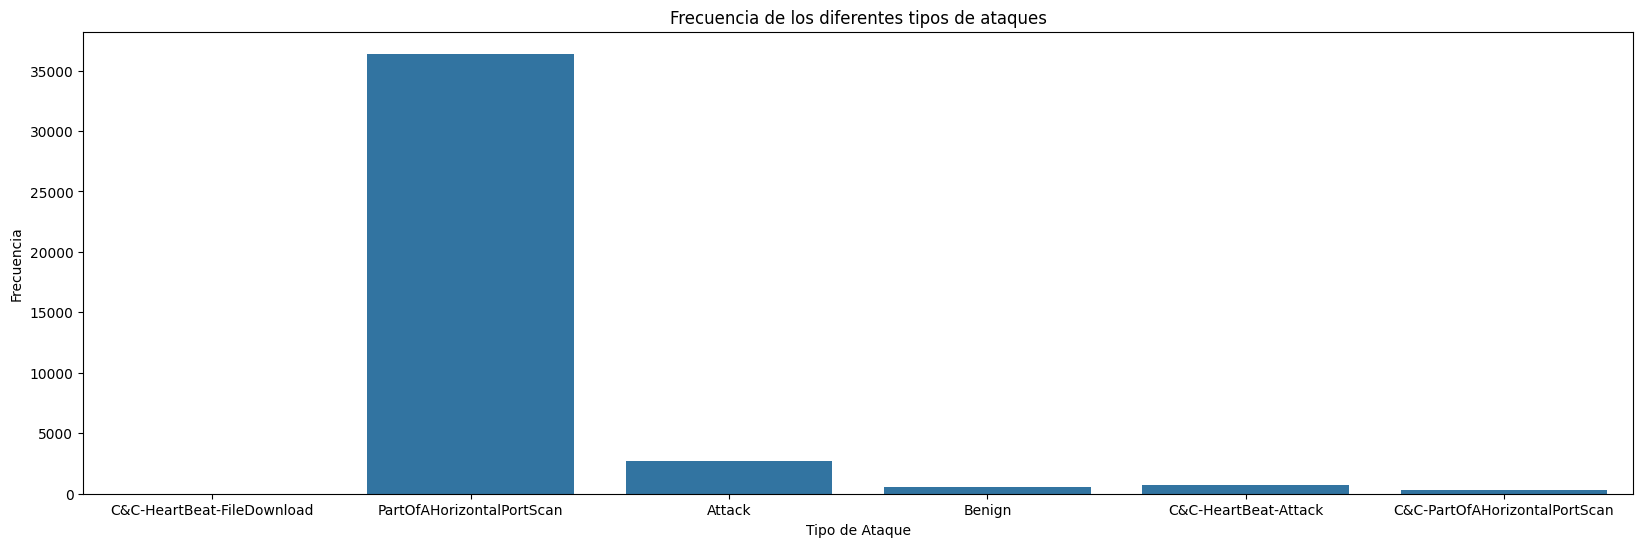

In [189]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='multi-label')
plt.title('Frecuencia de los diferentes tipos de ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

**Interpretacion 1 :**

La grafica nos muestra que el tipo de ataques mas frecuentes es *PartOfHorizontalPortScan* que se refiere a un tipo de ataque en el que ocurre en un contexto de escaneo horizontall, lo que implica que un atacante escanea multiples direcciones IP para un puerto especifico con el objetivo de encontrar vulnerabilidades en el sistema. En contraste con un escaneo vertical de puertos que implica escanear una sola direccion IP para multiples puertos.

.

.

.

**2. Existe alguna relacion entre la cantidad de informacion que se filtra durante un ataque y los servicios o protocolos que intervienen en una red de dispositivos IoT?**

**Hipotesis**: se espera que haya una relacion directa entre los ataques y los servicios y protocolos mas usados

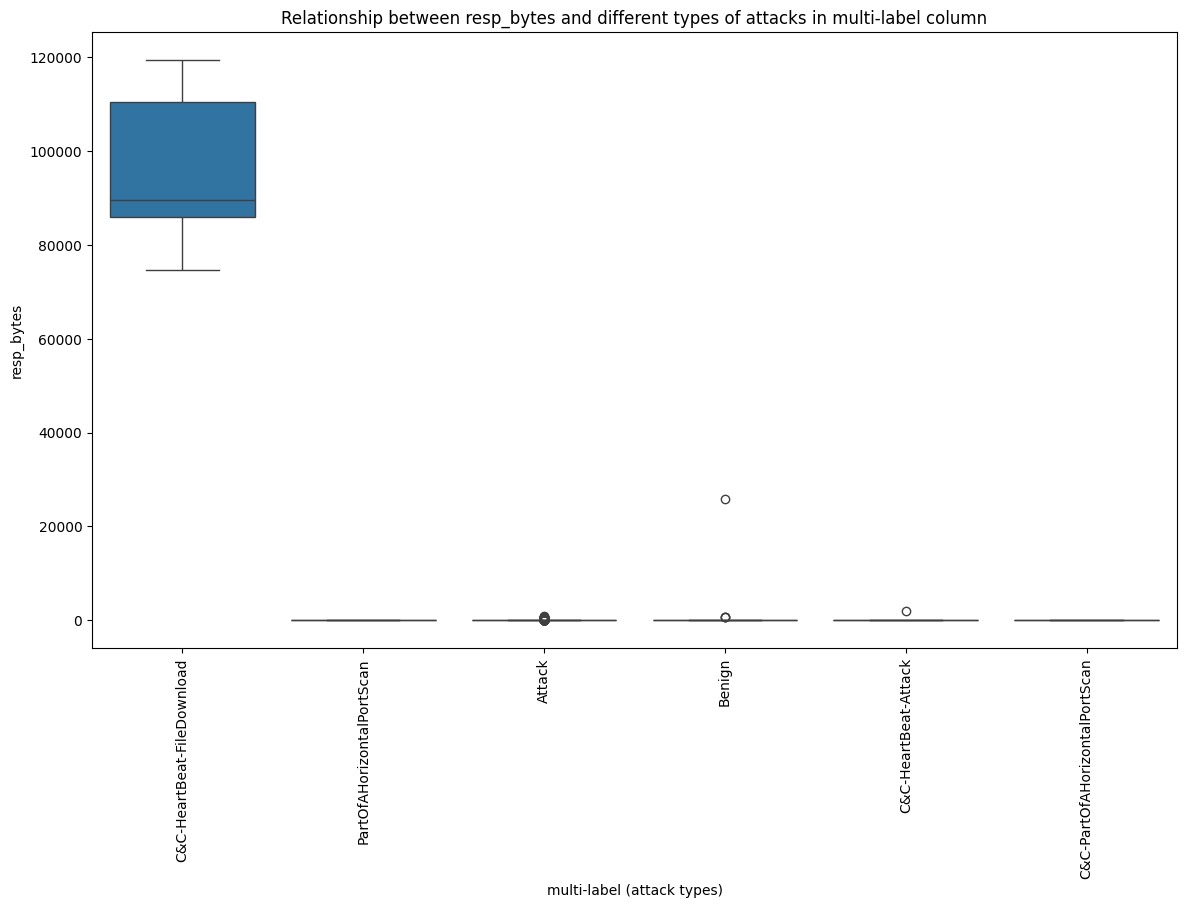

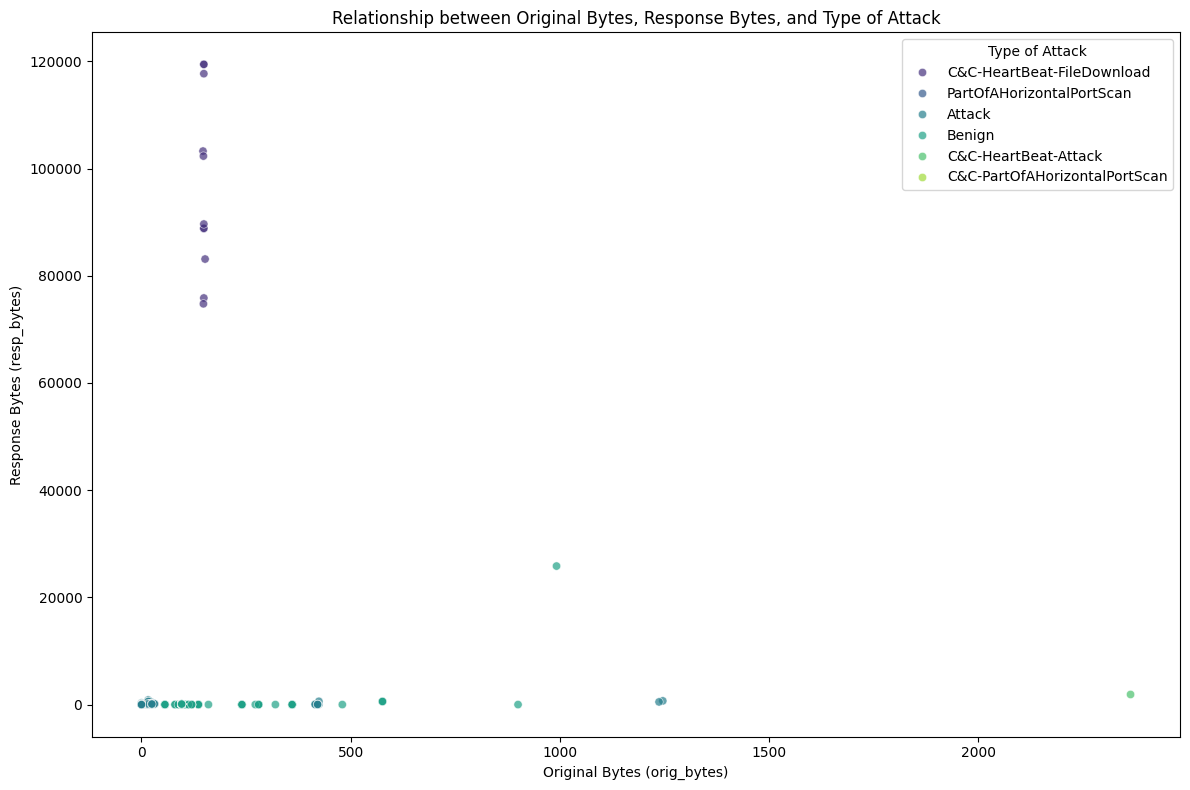

In [204]:
plt.figure(figsize=(14, 8))
df_filtered = df[df['multi-label'].notna()]

plt.title('Relationship between resp_bytes and different types of attacks in multi-label column')
plt.xlabel('multi-label (attack types)')
plt.ylabel('resp_bytes')
plt.xticks(rotation=90)

sns.boxplot(data=df_filtered, x='multi-label', y='resp_bytes')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='orig_bytes', y='resp_bytes', hue='multi-label', palette='viridis', alpha=0.7)
plt.title('Relationship between Original Bytes, Response Bytes, and Type of Attack')
plt.xlabel('Original Bytes (orig_bytes)')
plt.ylabel('Response Bytes (resp_bytes)')
plt.legend(title='Type of Attack')
plt.tight_layout()
plt.show()

**Interpretacion 2 :**

De acuerdo a los graficos a pesar de que la mayor frecuencias de intentos de ataques se dan por PartOfAHorizontalPortScan, los dispositivos IoT tienden a dar una mayor cantidad de informacion en respuesta cuando se da un ataque  *C&C-HeartBeat-FileDownload* en el cual C&C se refiere a “Command and Control”, que es un método comúnmente utilizado por los atacantes para controlar dispositivos infectados. HeartBeat se refiere a las señales regulares enviadas entre el dispositivo infectado y el servidor de comando y control para indicar que el dispositivo sigue estando bajo el control del atacanteFileDownload indica que el dispositivo infectado ha sido instruido para descargar un archivo, que podría ser un software malicioso adicional o datos robados

.

.

.

**3. Cual es la relacion entre los bytes enviados por un atacante, los bytes recibidos y los protocolos utilizados para el ataque?**

**Hipotesis**: Se espera que el protocolo utilizado para acceder a dispositivos IoT este relacionado con los protocolos que utilizan los usuarios para colectar toda la data que generan sus dispositivos IoT

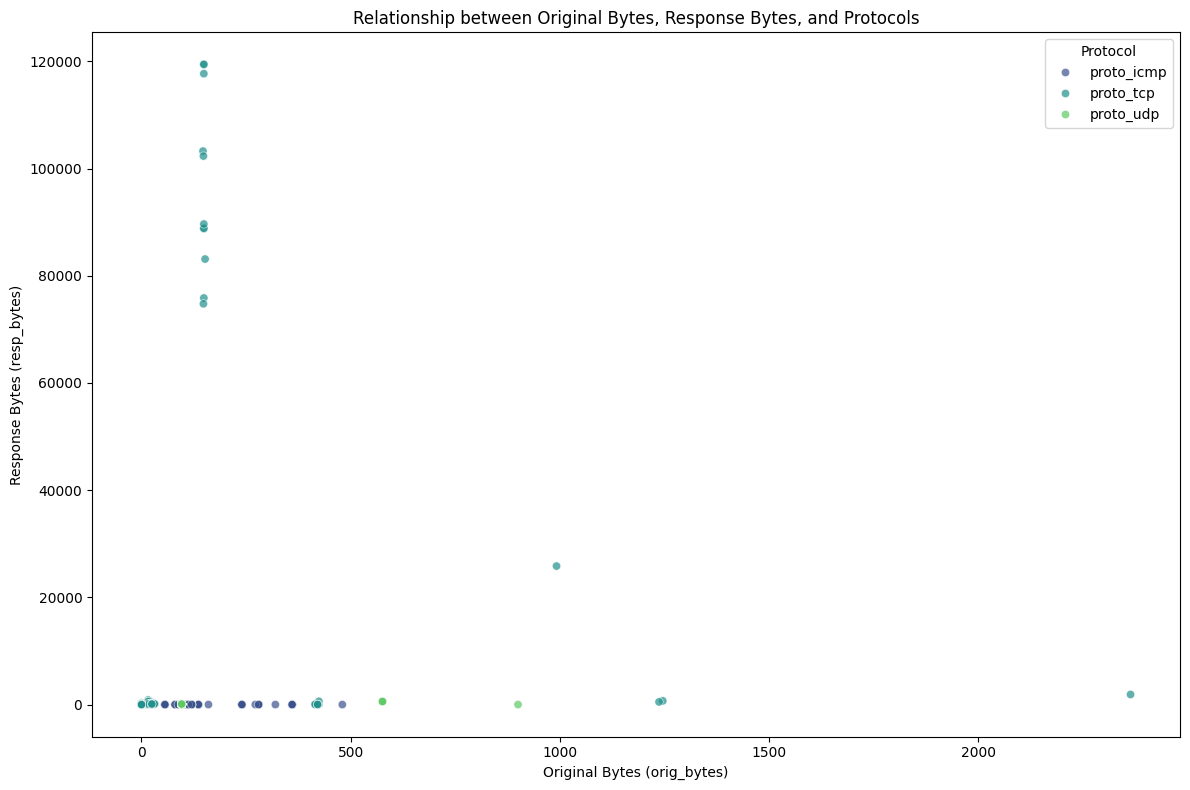

In [206]:
# Selecting only the columns that start with 'proto_'
proto_columns = [col for col in df.columns if col.startswith('proto_')]

# Melting the dataset to have proto_* columns in a single column
df_melted = df.melt(id_vars=['orig_bytes', 'resp_bytes'], value_vars=proto_columns,
                         var_name='protocol', value_name='value')

# Filtering only the rows where value is 1 (protocol is present)
df_filtered_proto = df_melted[df_melted['value'] == 1]

# Plotting a scatter plot with hue to represent the relationship between resp_bytes, orig_bytes, and proto_*
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered_proto, x='orig_bytes', y='resp_bytes', hue='protocol', palette='viridis', alpha=0.7)
plt.title('Relationship between Original Bytes, Response Bytes, and Protocols')
plt.xlabel('Original Bytes (orig_bytes)')
plt.ylabel('Response Bytes (resp_bytes)')
plt.legend(title='Protocol')
plt.tight_layout()

# Display the plot
plt.show()

**Interpretacion 3 :**

Se tiene de la grafica que el protocolo que mas se utilizan para realizar ataques es el protocolo TCP, esto se entiende a que por lo general la mayoria de dispositivos IoT cuentan con una plataforma de acceso mediante la cual el propietario o usuario de los servicios tiene acceso, ademas del uso de APIs para el acceso a este tipo de plataformas tambien usa protocolo TCP, aunque el protocolo TCP me permite una conectividad mas estable es mas recomendando el uso de protocolos UDP ya que como se aprecia en la grafica tienen una menor incidencia de ataques por su propia naturaleza fragmentada.

.

.

.

**4. Cual es la relacion entre los bytes enviados por un atacante, los bytes recibidos y los servicios utilizados para el ataque?**

**Hipotesis**: Se espera que el/los servicios utilizado/s para acceder a dispositivos IoT este relacionado con los protocolos que utilizan los usuarios para colectar toda la data que generan sus dispositivos IoT

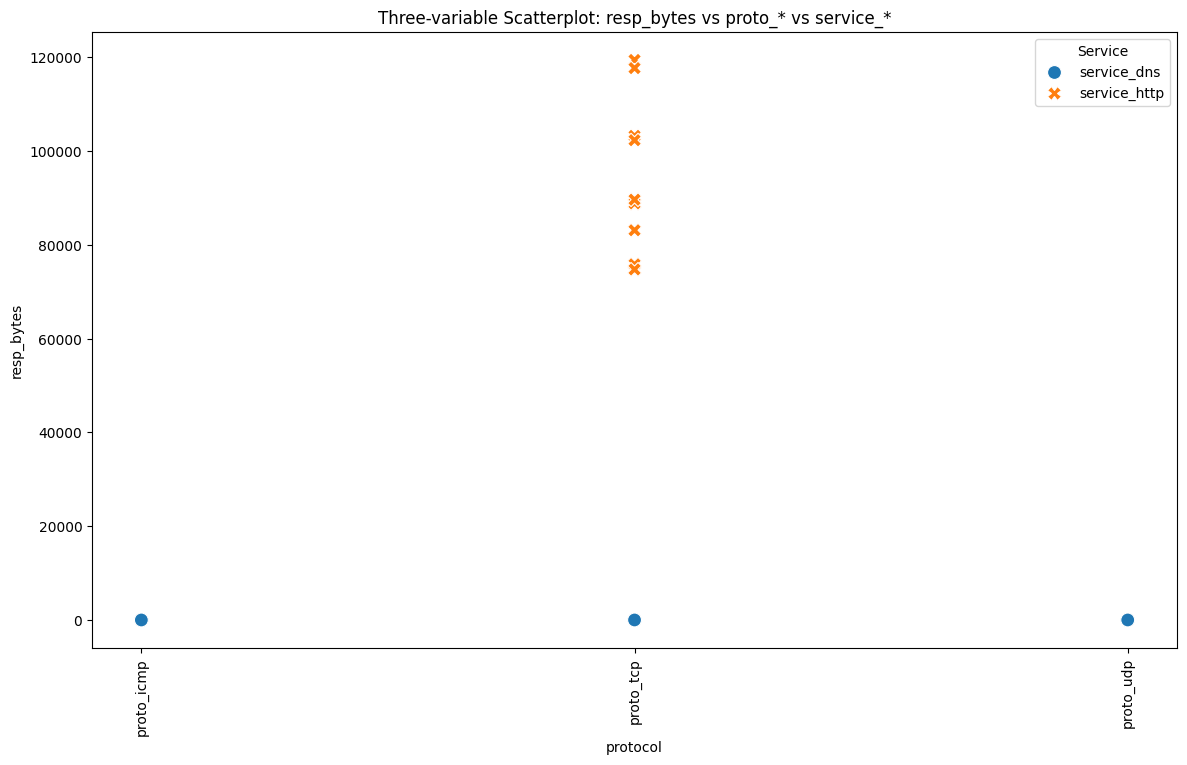

In [234]:
 # Extraemos las columnas  proto_* y service_*
proto_columns = [col for col in df.columns if col.startswith('proto_')]
service_columns = [col for col in df.columns if col.startswith('service_')]


# Se preparan los datos de los tipos de protocolos
proto_data = df.melt(id_vars=['resp_bytes'], value_vars=proto_columns, var_name='protocol', value_name='count')
proto_data = proto_data[proto_data['count'] > 0]

# Se preparan los datos de los tipos de servicios
service_data =df.melt(id_vars=['resp_bytes'], value_vars=service_columns, var_name='service', value_name='count')
service_data = service_data[service_data['count'] > 0]


# Obtenemos los protocolos y servicios relevantes
top_proto_columns = proto_data['protocol'].value_counts().index[:3]
top_service_columns = service_data['service'].value_counts().index[:3]

# Se filtran los datos de servicios y protocolos
filtered_proto_data = proto_data[proto_data['protocol'].isin(top_proto_columns)]
filtered_service_data = service_data[service_data['service'].isin(top_service_columns)]

merged_data = pd.merge(filtered_proto_data, filtered_service_data, on='resp_bytes', suffixes=('_proto', '_service'))


plt.figure(figsize=(14, 8))
sns.scatterplot(x='protocol', y='resp_bytes', hue='service', style='service', data=merged_data, palette='tab10', s=100)
plt.title('Three-variable Scatterplot: resp_bytes vs proto_* vs service_*')
plt.xticks(rotation=90)
plt.legend(title='Service')
plt.show()

**Interpretacion 4 :**

Se tiene de la grafica que el Servicio que mas se utilizan para realizar ataques es el protocolo HTTP, esto se entiende a que por lo general la mayoria de dispositivos IoT acceden a las plataformas donde se encuentran alojados los datos adquiridos, ademas las APIs tambien hacen uso de este servicio para el acceso a los datos y usuarios, lo mas recomendable para mayor seguridad es la implementacion del protocolo HTTPS y deshabilitar todos los puertos del protocolo HTTP de esta forma el atacante no tiene acceso ni metodos para escanear vulnerabilidades.